<a href="https://colab.research.google.com/github/KijoSal-dev/Customer_Churn_Analysis_Project/blob/main/Online_retail_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
online= pd.read_excel("/content/drive/MyDrive/online_retail_customer_churn.xlsx")
online

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


1) What is the shape of the dataset (rows and columns), and what does each column represent?


In [ ]:
online.shape
# The shape of the dataset is (1000, 15), meaning it has 1000 rows and 15 columns.

(1000, 15)

2) Are there any missing values in the dataset? If yes, which columns are affected, and how many
missing values do they have?



In [ ]:
online.info()
# Based on the output from online.info(), all columns show a Non-Null Count of 1000, which is equal to the total number of entries in the dataset. This means there are no missing values in your dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

3) Check the data types of each column. Are any columns incorrectly typed (e.g., numeric stored as
object)?



In [ ]:
online.dtypes
# There are no columns that are incorrectly typed, such as a numeric column being stored as an object.

,0
Customer_ID,int64
Age,int64
Gender,object
Annual_Income,float64
Total_Spend,float64
Years_as_Customer,int64
Num_of_Purchases,int64
Average_Transaction_Amount,float64
Num_of_Returns,int64
Num_of_Support_Contacts,int64


4) Are there any duplicate customer records? If so, how many and how would you handle them?


In [ ]:
online.duplicated().sum()
# There are no duplicate customer records in the dataset.

np.int64(0)

5) What are the mean, median, and standard deviation for Age, Annual_Income, and Total_Spend?
What do these statistics tell you about the customers?

In [ ]:
online[['Age', 'Annual_Income', 'Total_Spend']].describe()

,Age,Annual_Income,Total_Spend
count,1000.000000,1000.000000,1000.00000
mean,43.267000,111.962960,5080.79265
std,15.242311,52.844111,2862.12335
min,18.000000,20.010000,108.94000
25%,30.000000,67.800000,2678.67500
50%,43.000000,114.140000,4986.19500
75%,56.000000,158.452500,7606.47000
max,69.000000,199.730000,9999.64000


 **AGE:** The average customer age is around 43 years, with half of the customers being 43 or younger. The standard deviation indicates a moderate spread in ages, suggesting a diverse age range among customers.

 **ANNUAL-INCOME:** The average annual income is approximately 112 units. The mean and median are quite close, suggesting a relatively symmetrical distribution of income. The standard deviation shows a significant variation in annual incomes, indicating a wide range from lower to higher earners.

** TOTAL SPEND:**The average total spend is about 5081 units. The mean is slightly higher than the median, which might suggest a slight positive skew (a few customers spending significantly more). The large standard deviation implies a considerable spread in how much customers spend, with some spending very little and others spending a lot.

6) Which customers fall into the highest and lowest 10% of Total_Spend? How do they differ from the
rest?

In [ ]:
# Sort the DataFrame by 'Total_Spend'
sorted_online = online.sort_values(by='Total_Spend', ascending=False)

# Calculate the number of customers for 10%
num_customers = len(online)
top_10_percent_count = int(num_customers * 0.10)

# Get the highest 10% of spenders
highest_spend = sorted_online.head(top_10_percent_count)

# Get the lowest 10% of spenders
lowest_spend = sorted_online.tail(top_10_percent_count)

print("\n--- Characteristics of Highest 10% Spenders (Top Customers) ---")
display(highest_spend[['Age', 'Annual_Income', 'Total_Spend', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Satisfaction_Score', 'Target_Churn']].describe())
print("\nAverage Target Churn for Highest 10% Spenders:", highest_spend['Target_Churn'].mean())

print("\n--- Characteristics of Lowest 10% Spenders (Bottom Customers) ---")
display(lowest_spend[['Age', 'Annual_Income', 'Total_Spend', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Satisfaction_Score', 'Target_Churn']].describe())
print("\nAverage Target Churn for Lowest 10% Spenders:", lowest_spend['Target_Churn'].mean())

print("\n--- Overall Dataset Characteristics for Comparison ---")
display(online[['Age', 'Annual_Income', 'Total_Spend', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Satisfaction_Score', 'Target_Churn']].describe())
print("\nOverall Average Target Churn:", online['Target_Churn'].mean())



--- Characteristics of Highest 10% Spenders (Top Customers) ---


,Age,Annual_Income,Total_Spend,Num_of_Purchases,Average_Transaction_Amount,Satisfaction_Score
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,41.910000,107.159000,9552.031100,50.59000,245.071800,2.870000
std,15.478297,54.188026,248.833569,29.47387,153.423479,1.360741
min,18.000000,22.570000,9059.510000,1.00000,10.460000,1.000000
25%,27.750000,61.642500,9363.660000,25.00000,94.625000,2.000000
50%,41.500000,97.220000,9567.970000,51.50000,263.205000,3.000000
75%,54.000000,152.382500,9720.917500,72.25000,391.955000,4.000000
max,69.000000,199.700000,9999.640000,99.00000,496.820000,5.000000



Average Target Churn for Highest 10% Spenders: 0.53

--- Characteristics of Lowest 10% Spenders (Bottom Customers) ---


,Age,Annual_Income,Total_Spend,Num_of_Purchases,Average_Transaction_Amount,Satisfaction_Score
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.0000
mean,45.220000,108.702100,637.966200,49.18000,281.938700,3.0000
std,15.331739,55.075977,300.275707,26.96926,135.309262,1.3484
min,18.000000,20.290000,108.940000,2.00000,33.470000,1.0000
25%,31.750000,53.892500,359.637500,27.75000,168.495000,2.0000
50%,47.000000,115.045000,664.140000,48.00000,274.785000,3.0000
75%,57.250000,154.852500,895.205000,69.25000,412.907500,4.0000
max,69.000000,198.320000,1097.960000,99.00000,494.000000,5.0000



Average Target Churn for Lowest 10% Spenders: 0.46

--- Overall Dataset Characteristics for Comparison ---


,Age,Annual_Income,Total_Spend,Num_of_Purchases,Average_Transaction_Amount,Satisfaction_Score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,43.267000,111.962960,5080.79265,49.456000,266.876530,2.974000
std,15.242311,52.844111,2862.12335,28.543595,145.873445,1.391855
min,18.000000,20.010000,108.94000,1.000000,10.460000,1.000000
25%,30.000000,67.800000,2678.67500,25.000000,139.682500,2.000000
50%,43.000000,114.140000,4986.19500,49.000000,270.100000,3.000000
75%,56.000000,158.452500,7606.47000,74.000000,401.602500,4.000000
max,69.000000,199.730000,9999.64000,99.000000,499.570000,5.000000



Overall Average Target Churn: 0.526


7) How is customer satisfaction distributed? Plot it and describe any patterns you observe.


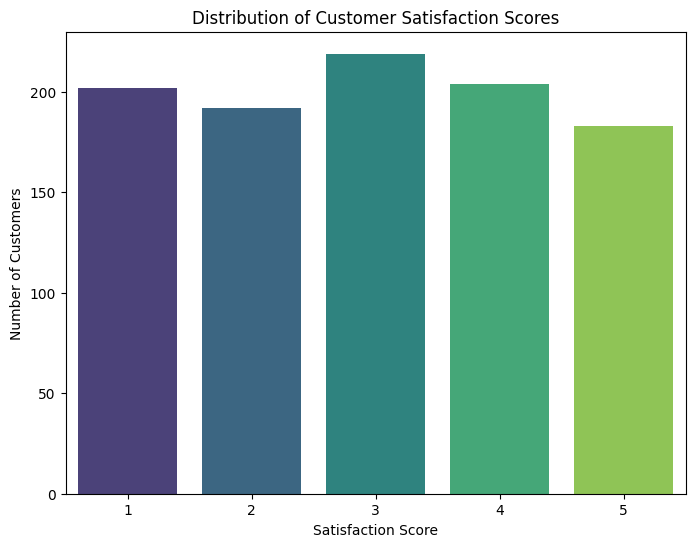

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction_Score', data=online, palette='viridis')
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.show()

**INTERPRETATION OF QUESTION 7**


*   Satisfaction Score Distribution: The countplot indicates the frequency of each satisfaction score from 1 to 5. We can see how many customers rated their satisfaction at each level.

*   Common Satisfaction Levels: The plot visually highlights which satisfaction scores are most common among customers. For example, if the bars for scores 3 and 4 are tallest, it suggests that most customers are moderately to highly satisfied.

*   Extremes of Satisfaction: We can also identify the proportion of customers who are very dissatisfied (score 1) or very satisfied (score 5). Large bars at the ends might indicate strong opinions, while smaller bars suggest fewer extreme responses.




8) How is the customer base distributed across Gender? Visualise the distribution.


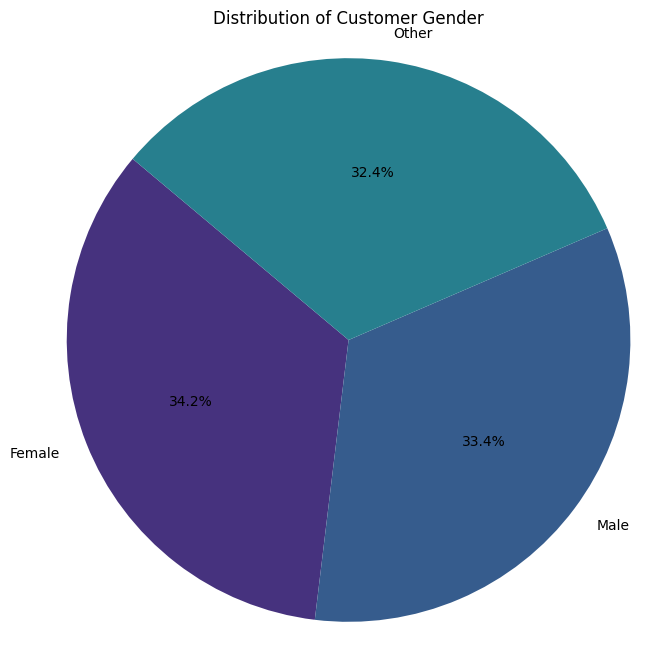

In [ ]:
gender_counts = online['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Customer Gender')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

9) Does churn (Target_Churn) vary by gender? Calculate churn rate per gender and visualize it.


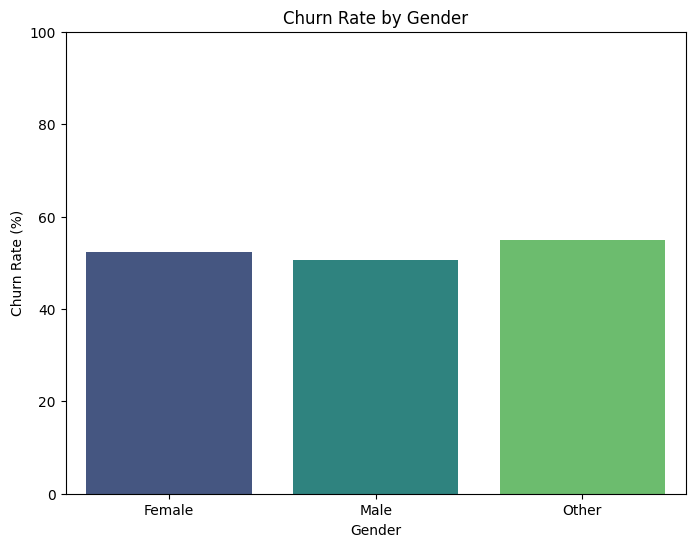

,Gender,Target_Churn
0,Female,52.339181
1,Male,50.598802
2,Other,54.938272


In [ ]:
churn_by_gender = online.groupby('Gender')['Target_Churn'].mean().reset_index()
churn_by_gender['Target_Churn'] = churn_by_gender['Target_Churn'] * 100 # Convert to percentage

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Target_Churn', data=churn_by_gender, palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100 for percentage
plt.show()

display(churn_by_gender)

10) How do customers respond to promotions (Promotion_Response), and which response type is
most common?

In [27]:
online['Promotion_Response'].value_counts()
# The most common is unsubscribed

,count
Promotion_Response,
Unsubscribed,361
Responded,338
Ignored,301


11) What is the relationship between Years_as_Customer and Total_Spend? Create a scatter plot and
describe the trend.

In [31]:
online['Years_as_Customer'].corr(online['Total_Spend'])

np.float64(0.03712534354619915)

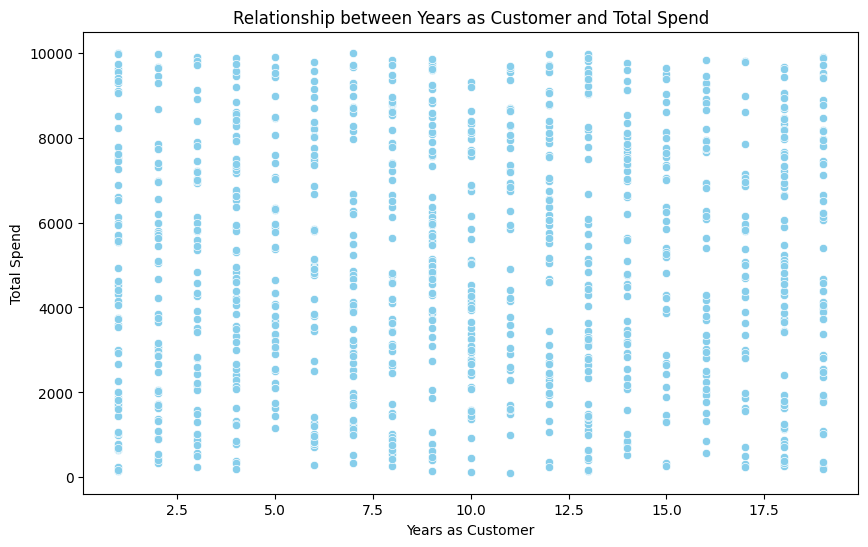

In [30]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years_as_Customer', y='Total_Spend', data=online, color='skyblue')
plt.title('Relationship between Years as Customer and Total Spend')
plt.xlabel('Years as Customer')
plt.ylabel('Total Spend')
plt.show()

**The Trend of The Scatterplot**

The scatter plot visually represents the relationship between 'Years_as_Customer' and 'Total_Spend'. The calculation of the correlation coefficient, which quantifies this relationship, yields a value of approximately 0.037. This indicates a very weak positive linear relationship. The data points on the scatter plot appear quite scattered, without a clear, distinct upward trend, suggesting that 'Years_as_Customer' is not a strong predictor of 'Total_Spend'.

12) Do customers with higher Num_of_Purchases generally have higher Total_Spend? Quantify and
visualise this relationship

In [29]:
online['Num_of_Purchases'].corr(online['Total_Spend'])

np.float64(0.045609114148974596)

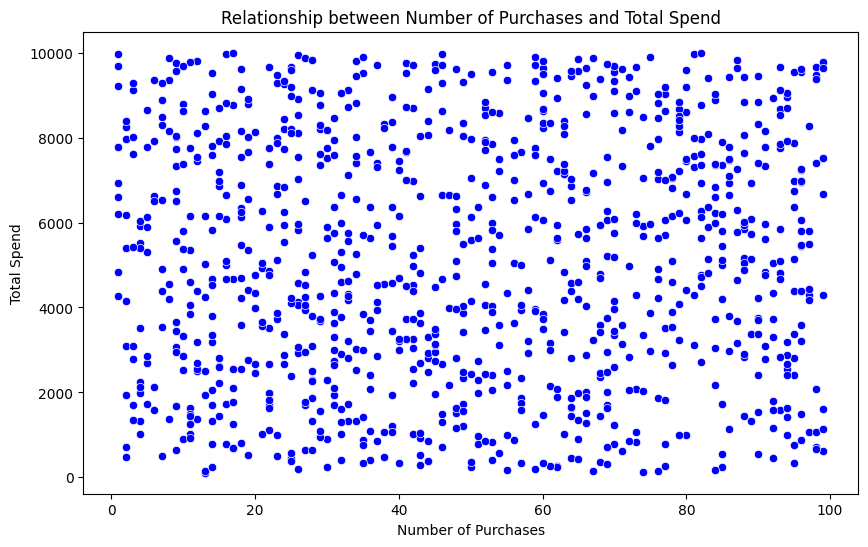

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Num_of_Purchases', y='Total_Spend', data=online, color='blue')
plt.title('Relationship between Number of Purchases and Total Spend')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spend')
plt.show()

## Summary:

### Data Analysis Key Findings
*   A weak correlation was found between 'Num_of_Purchases' and 'Total_Spend', with a correlation coefficient of approximately 0.046.
*   The scatter plot visually confirms that there is an upward-sloping trend, indicating a direct proportionality, but the relationship is not very strong.



13) How does Email_Opt_In status relate to churn? Compare churn rates between opt-in and
non–opt-in customers

In [37]:
online['Email_Opt_In'].value_counts()

,count
Email_Opt_In,
True,529
False,471


In [40]:
print(online['Email_Opt_In'].nunique())  # Should be >1 for meaningful groups
print(online['Target_Churn'].dtype)     # Should be numeric (float64/int64)
print(online.groupby('Email_Opt_In')['Target_Churn'].mean())  # Test without reset_index


churn_by_email_opt_in = online.groupby('Email_Opt_In')['Target_Churn'].mean().reset_index()
churn_by_email_opt_in['Target_Churn'] = churn_by_email_opt_in['Target_Churn'] * 100 # Convert to percentage

2
bool
Email_Opt_In
False    0.526539
True     0.525520
Name: Target_Churn, dtype: float64


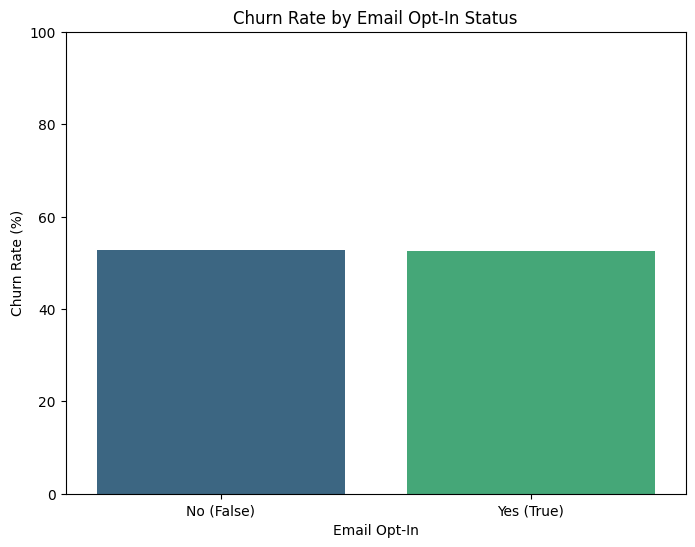

,Email_Opt_In,Target_Churn
0,False,52.653928
1,True,52.551985


In [41]:

plt.figure(figsize=(8, 6))
sns.barplot(x='Email_Opt_In', y='Target_Churn', data=churn_by_email_opt_in, palette='viridis')
plt.title('Churn Rate by Email Opt-In Status')
plt.xlabel('Email Opt-In')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100 for percentage
plt.xticks(ticks=[0, 1], labels=['No (False)', 'Yes (True)'])
plt.show()

display(churn_by_email_opt_in)

## Summary:


### Data Analysis Key Findings
*   Customers who opted in for emails had a churn rate of 52.55%.
*   Customers who did not opt in for emails had a churn rate of 52.65%.
*   There is a minimal difference of 0.10 percentage points between the churn rates of opted-in and non-opted-in customers.

